# **Introduction to Random Forest:**

Random Forest is a machine learning algorithm that combines many decision trees to make better predictions. Each tree gives its own result, and the final decision is based on the majority (for classification) or average (for regression).

### Why is Random Forest Important?

1. **Better Accuracy**: Combining trees reduces errors, leading to more reliable predictions.
2. **Handles Complex Data**: Works well with messy data, like missing values or noisy features.
3. **Reduces Overfitting**: By averaging multiple trees, it avoids making predictions too closely based on the training data.

### Why Use Random Forest?

- **Versatile**: It can be used for both classification (categorizing data) and regression (predicting values).
- **Feature Importance**: It helps identify which features are most important in making predictions.

### Advantages:

1. **Accuracy**: It often performs better than single decision trees.
2. **Handles Large Datasets**: It can process large amounts of data efficiently.
3. **Less Overfitting**: The randomness in tree-building prevents overfitting.

### Disadvantages:

1. **Slower**: Training many trees can take longer.
2. **Less Interpretability**: Unlike decision trees, it’s harder to explain why a particular prediction was made.

In summary, Random Forest is a great tool when you need accurate and robust predictions, especially with complex data.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)


In [3]:
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-5.003814,-4.883514,-0.713163,0.677468,-1.375890,0
1,-0.760622,-1.949844,-1.584522,0.181098,-0.631052,0
2,-2.236998,0.440316,0.713298,-0.812023,2.606285,1
3,-2.360890,0.101821,0.430706,-0.485467,2.785392,1
4,-3.609629,-5.802765,-0.714273,1.630247,-2.171633,0


In [4]:
# function for row sampling

def sample_rows(df, percent):
    return df.sample(int(percent*df.shape[0]), replace=True)

In [5]:
import random

# function for feature sampling
def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent*df.shape[1] - 1))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [6]:
# function for combined sampling
def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [7]:
df1 = sample_rows(df, 0.2)

In [8]:
df2 = sample_rows(df, 0.2)

In [9]:
df3 = sample_rows(df, 0.2)

In [10]:
df1.shape

(20, 6)

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [12]:
clf1.fit(df1.iloc[:, 0:5], df1.iloc[:, -1])
clf2.fit(df1.iloc[:, 0:5], df1.iloc[:, -1])
clf3.fit(df1.iloc[:, 0:5], df1.iloc[:, -1])

DecisionTreeClassifier()

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.6, 0.8333333333333334, 'x[3] <= -0.123\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.4, 0.5, 'x[2] <= -0.671\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

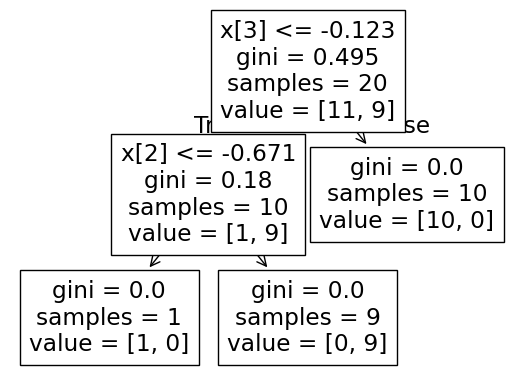

In [14]:
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.349\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= -2.595\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]')]

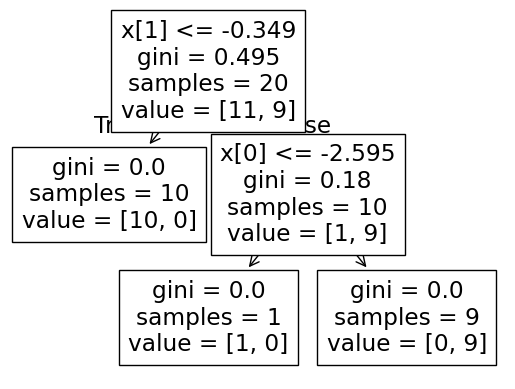

In [15]:
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[3] <= -0.123\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.4, 0.5, 'x[1] <= -0.349\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

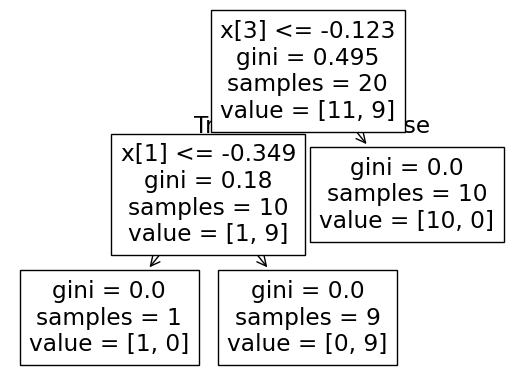

In [16]:
plot_tree(clf3)

In [17]:
clf1.predict(np.array([1.092251,	-0.618175,	1.501664,	2.466172,	-0.142319]).reshape(1,5))

C:\Users\write\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [18]:
clf2.predict(np.array([1.092251,	-0.618175,	1.501664,	2.466172,	-0.142319]).reshape(1, 5))

C:\Users\write\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [19]:
clf3.predict(np.array([1.092251,	-0.618175,	1.501664,	2.466172,	-0.142319]).reshape(1, 5))

C:\Users\write\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

### writing using Sample Learning

In [20]:
df1 = sample_features(df, 0.8)

C:\Users\write\AppData\Local\Temp\ipykernel_84\861640332.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [21]:
df2 = sample_features(df, 0.8)

C:\Users\write\AppData\Local\Temp\ipykernel_84\861640332.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [22]:
df3 = sample_features(df, 0.8)

C:\Users\write\AppData\Local\Temp\ipykernel_84\861640332.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [23]:

df3

,col4,col1,col2,target
0,0.677468,-5.003814,-4.883514,0
1,0.181098,-0.760622,-1.949844,0
2,-0.812023,-2.236998,0.440316,1
3,-0.485467,-2.360890,0.101821,1
4,1.630247,-3.609629,-5.802765,0
...,...,...,...,...
95,0.586258,-4.148581,0.607816,1
96,0.435095,-2.397975,-1.991180,0
97,-0.639207,-0.638226,-1.561509,0
98,-0.854244,-1.005890,0.830101,1


In [24]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [25]:
clf1.fit(df1.iloc[:,0:3], df1.iloc[:,-1])
clf2.fit(df1.iloc[:,0:3], df1.iloc[:,-1])
clf3.fit(df1.iloc[:,0:3], df1.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.36363636363636365, 0.9375, 'x[1] <= -0.232\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.18181818181818182, 0.8125, 'x[0] <= -0.671\ngini = 0.124\nsamples = 45\nvalue = [3, 42]'),
 Text(0.2727272727272727, 0.875, 'True  '),
 Text(0.09090909090909091, 0.6875, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.2727272727272727, 0.6875, 'gini = 0.0\nsamples = 42\nvalue = [0, 42]'),
 Text(0.5454545454545454, 0.8125, 'x[2] <= 0.885\ngini = 0.249\nsamples = 55\nvalue = [47, 8]'),
 Text(0.45454545454545453, 0.875, '  False'),
 Text(0.45454545454545453, 0.6875, 'x[2] <= -0.433\ngini = 0.174\nsamples = 52\nvalue = [47, 5]'),
 Text(0.2727272727272727, 0.5625, 'x[2] <= -2.516\ngini = 0.054\nsamples = 36\nvalue = [35, 1]'),
 Text(0.18181818181818182, 0.4375, 'x[2] <= -2.573\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.09090909090909091, 0.3125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.2727272727272727, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text

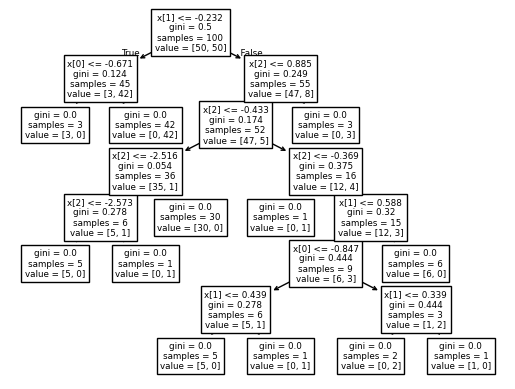

In [26]:
plot_tree(clf1)

[Text(0.4, 0.9444444444444444, 'x[1] <= -0.232\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2, 0.8333333333333334, 'x[0] <= -0.671\ngini = 0.124\nsamples = 45\nvalue = [3, 42]'),
 Text(0.30000000000000004, 0.8888888888888888, 'True  '),
 Text(0.1, 0.7222222222222222, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3, 0.7222222222222222, 'gini = 0.0\nsamples = 42\nvalue = [0, 42]'),
 Text(0.6, 0.8333333333333334, 'x[2] <= 0.885\ngini = 0.249\nsamples = 55\nvalue = [47, 8]'),
 Text(0.5, 0.8888888888888888, '  False'),
 Text(0.5, 0.7222222222222222, 'x[2] <= -0.433\ngini = 0.174\nsamples = 52\nvalue = [47, 5]'),
 Text(0.3, 0.6111111111111112, 'x[2] <= -2.516\ngini = 0.054\nsamples = 36\nvalue = [35, 1]'),
 Text(0.2, 0.5, 'x[1] <= 0.873\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.1, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.3888888888888889, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 30\nval

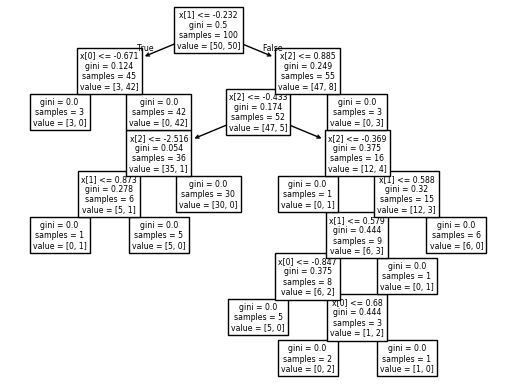

In [27]:
plot_tree(clf2)

[Text(0.4, 0.9444444444444444, 'x[1] <= -0.232\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2, 0.8333333333333334, 'x[0] <= -0.671\ngini = 0.124\nsamples = 45\nvalue = [3, 42]'),
 Text(0.30000000000000004, 0.8888888888888888, 'True  '),
 Text(0.1, 0.7222222222222222, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3, 0.7222222222222222, 'gini = 0.0\nsamples = 42\nvalue = [0, 42]'),
 Text(0.6, 0.8333333333333334, 'x[2] <= 0.885\ngini = 0.249\nsamples = 55\nvalue = [47, 8]'),
 Text(0.5, 0.8888888888888888, '  False'),
 Text(0.5, 0.7222222222222222, 'x[2] <= -0.433\ngini = 0.174\nsamples = 52\nvalue = [47, 5]'),
 Text(0.3, 0.6111111111111112, 'x[2] <= -2.516\ngini = 0.054\nsamples = 36\nvalue = [35, 1]'),
 Text(0.2, 0.5, 'x[2] <= -2.573\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.1, 0.3888888888888889, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 30\nva

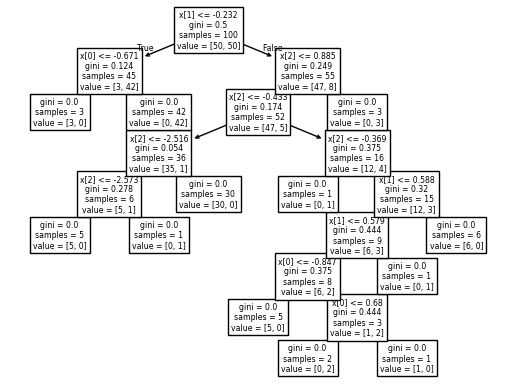

In [28]:
plot_tree(clf3)

In [29]:
# columns selected in df
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col3', 'col4', 'target'], dtype='object')
Index(['col4', 'col1', 'col2', 'target'], dtype='object')


In [30]:
df1

,col3,col4,col5,target
0,-0.713163,0.677468,-1.375890,0
1,-1.584522,0.181098,-0.631052,0
2,0.713298,-0.812023,2.606285,1
3,0.430706,-0.485467,2.785392,1
4,-0.714273,1.630247,-2.171633,0
...,...,...,...,...
95,-1.683049,0.586258,0.734705,1
96,-0.682982,0.435095,-0.719015,0
97,-5.874560,-0.639207,-0.182875,0
98,0.757090,-0.854244,1.274396,1


In [31]:
clf1.predict(np.array([1.516810, 1.793227, 2.303493]).reshape(1, 3))

C:\Users\write\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [32]:
clf2.predict(np.array([1.516810,	1.793227,	2.303493]).reshape(1, 3))

C:\Users\write\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [33]:
clf3.predict(np.array([1.516810, 1.793227, 2.303493]).reshape(1, 3))

C:\Users\write\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

### combined sampling

In [34]:
df1 = combined_sampling(df, 0.5, 0.5)

C:\Users\write\AppData\Local\Temp\ipykernel_84\861640332.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [35]:
df2 = combined_sampling(df, 0.5, 0.5)

C:\Users\write\AppData\Local\Temp\ipykernel_84\861640332.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [36]:
df3 = combined_sampling(df, 0.5, 0.5)

C:\Users\write\AppData\Local\Temp\ipykernel_84\861640332.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [37]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col5', 'target'], dtype='object')
Index(['col5', 'col3', 'target'], dtype='object')
Index(['col1', 'col2', 'target'], dtype='object')


In [38]:
df3.head()

,col1,col2,target
39,-0.763612,2.459793,1
18,-3.438294,-0.322568,0
48,-3.769840,-0.176636,1
11,0.161252,-1.806561,0
78,1.077283,2.474587,1


In [39]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [40]:
clf1.fit(df.iloc[:,0:2], df.iloc[:,-1])
clf2.fit(df.iloc[:,0:2], df.iloc[:,-1])
clf3.fit(df.iloc[:,0:2], df.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.45652173913043476, 0.9545454545454546, 'x[1] <= -0.57\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.41304347826086957, 0.8636363636363636, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.43478260869565216, 0.9090909090909092, 'True  '),
 Text(0.5, 0.8636363636363636, 'x[1] <= 2.733\ngini = 0.379\nsamples = 67\nvalue = [17, 50]'),
 Text(0.4782608695652174, 0.9090909090909092, '  False'),
 Text(0.45652173913043476, 0.7727272727272727, 'x[1] <= 0.367\ngini = 0.355\nsamples = 65\nvalue = [15, 50]'),
 Text(0.2608695652173913, 0.6818181818181818, 'x[1] <= 0.316\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.21739130434782608, 0.5909090909090909, 'x[0] <= -0.336\ngini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(0.17391304347826086, 0.5, 'x[0] <= -2.821\ngini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(0.08695652173913043, 0.4090909090909091, 'x[0] <= -3.604\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.043478260869565216, 0.3181818181818182, 'gi

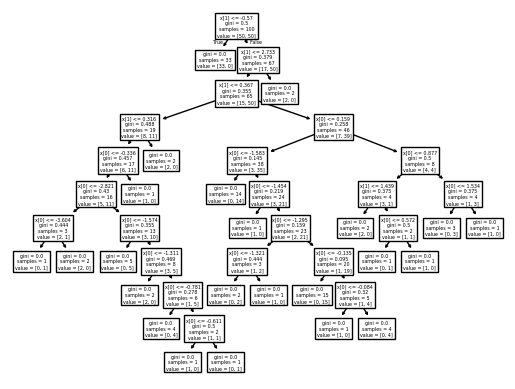

In [41]:
plot_tree(clf1)

[Text(0.44, 0.9545454545454546, 'x[1] <= -0.57\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.4, 0.8636363636363636, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.42000000000000004, 0.9090909090909092, 'True  '),
 Text(0.48, 0.8636363636363636, 'x[1] <= 2.733\ngini = 0.379\nsamples = 67\nvalue = [17, 50]'),
 Text(0.45999999999999996, 0.9090909090909092, '  False'),
 Text(0.44, 0.7727272727272727, 'x[1] <= 0.367\ngini = 0.355\nsamples = 65\nvalue = [15, 50]'),
 Text(0.24, 0.6818181818181818, 'x[1] <= 0.316\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.2, 0.5909090909090909, 'x[0] <= -0.336\ngini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(0.16, 0.5, 'x[0] <= -2.821\ngini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(0.08, 0.4090909090909091, 'x[0] <= -3.604\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.04, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.12, 0.3181818181818182, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Te

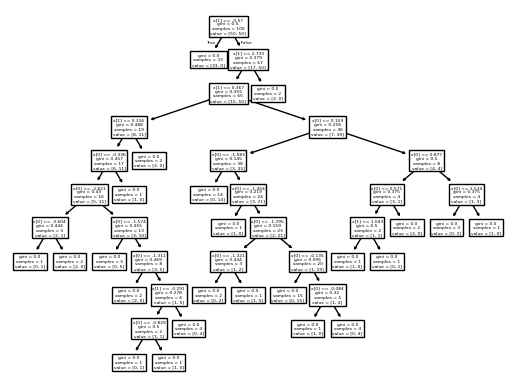

In [42]:
plot_tree(clf2)

[Text(0.44, 0.9545454545454546, 'x[1] <= -0.57\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.4, 0.8636363636363636, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.42000000000000004, 0.9090909090909092, 'True  '),
 Text(0.48, 0.8636363636363636, 'x[1] <= 2.733\ngini = 0.379\nsamples = 67\nvalue = [17, 50]'),
 Text(0.45999999999999996, 0.9090909090909092, '  False'),
 Text(0.44, 0.7727272727272727, 'x[1] <= 0.367\ngini = 0.355\nsamples = 65\nvalue = [15, 50]'),
 Text(0.24, 0.6818181818181818, 'x[1] <= 0.316\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.2, 0.5909090909090909, 'x[0] <= -0.336\ngini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(0.16, 0.5, 'x[0] <= -2.821\ngini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(0.08, 0.4090909090909091, 'x[0] <= -3.604\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.04, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.12, 0.3181818181818182, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Te

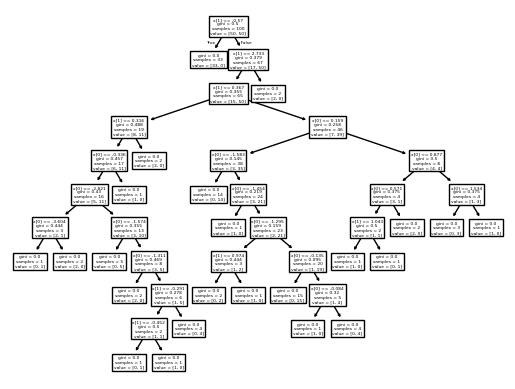

In [43]:
plot_tree(clf3)

In [44]:
clf1.predict(np.array([-1.594940, 2.723600]).reshape(1, 2))

C:\Users\write\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [45]:
clf2.predict(np.array([-1.594940, 2.723600]).reshape(1, 2))

C:\Users\write\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [46]:
clf3.predict(np.array([-1.594940, 2.723600]).reshape(1, 2))

C:\Users\write\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])